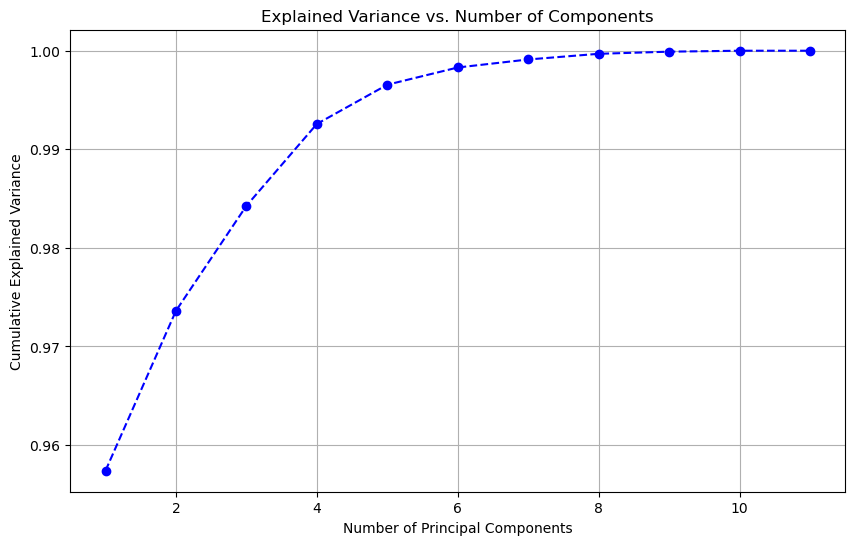

Optimal number of components for 95% explained variance: 1
['W' 'L' 'W' 'W' 'L' 'W' 'L' 'W' 'W' 'W' 'L' 'L']

 0     W
2     W
4     W
6     W
8     W
10    W
12    L
14    L
16    L
18    L
20    L
22    L
Name: Result, dtype: object


0.5833333333333334

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_distances = pd.read_csv(r'.\\FULLDATASET.csv')

even = np.arange(0,23,2)
odd = np.arange(1,23,2)

X_train = df_distances.loc[odd, 'Distance (1 to 2)':'Distance (67 to 68)']
y_train = df_distances.loc[odd,'Result']

X_test = df_distances.loc[even, 'Distance (1 to 2)':'Distance (67 to 68)']
y_test = df_distances.loc[even,'Result']

# Standardize features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components based on the graph (e.g., 95% explained variance)
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Optimal number of components for 95% explained variance: {optimal_components}")




cl = MLPClassifier(random_state=50, max_iter=10000).fit(X_train, y_train)

print(cl.predict(X_test))
print('\n',y_test.T)
cl.score(X_test,y_test)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train a model with one principal component
X_train_pca_single = X_train_pca[:, :1]  # Only the first component
X_test_pca_single = X_test_pca[:, :1]

# Logistic Regression
log_reg = LogisticRegression(random_state=50)
log_reg.fit(X_train_pca_single, y_train)
print("Logistic Regression Accuracy:", log_reg.score(X_test_pca_single, y_test))

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=50)
decision_tree.fit(X_train_pca_single, y_train)
print("Decision Tree Accuracy:", decision_tree.score(X_test_pca_single, y_test))


Logistic Regression Accuracy: 0.75
Decision Tree Accuracy: 0.75


In [4]:
# Feature contributions to the first principal component
component_contributions = pca.components_[0]  # First principal component
feature_names = X_train.columns

# Create a DataFrame for better visualization
import pandas as pd
contributions_df = pd.DataFrame({
    'Feature': feature_names,
    'Contribution': component_contributions
}).sort_values(by='Contribution', key=abs, ascending=False)

print("Top contributing features:")
print(contributions_df.head(10))


Top contributing features:
                  Feature  Contribution
631   Distance (11 to 18)      0.021409
1913  Distance (41 to 55)      0.021405
2068  Distance (48 to 49)      0.021404
2048  Distance (47 to 49)      0.021403
1886  Distance (40 to 55)      0.021402
406    Distance (7 to 27)      0.021401
1923  Distance (41 to 65)      0.021400
1982  Distance (44 to 49)      0.021400
398    Distance (7 to 19)      0.021399
425    Distance (7 to 46)      0.021399


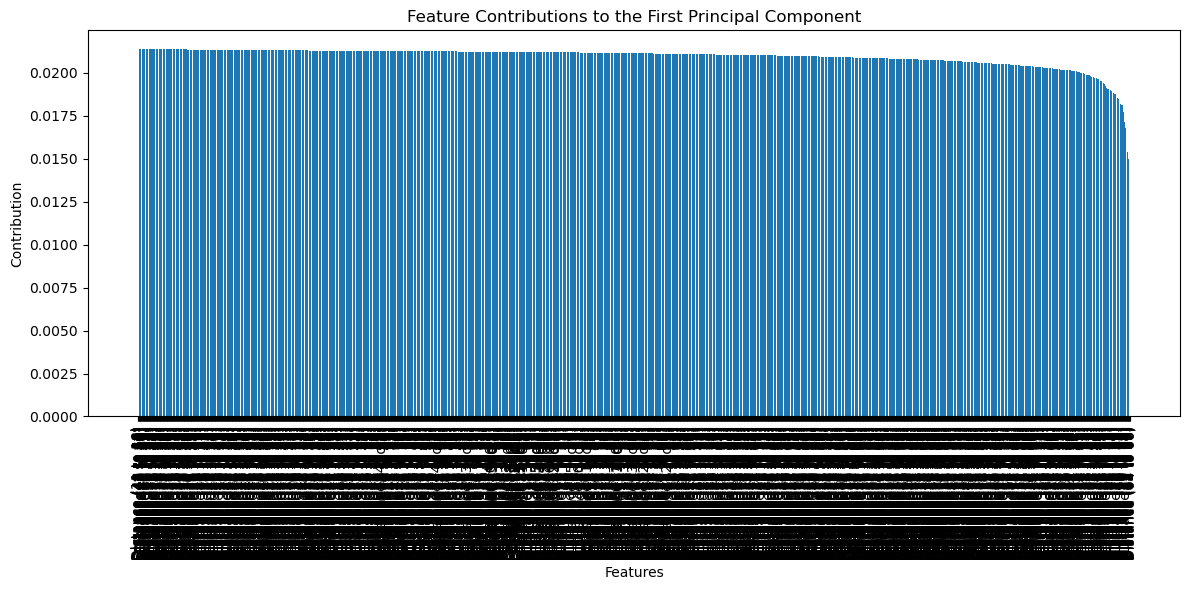

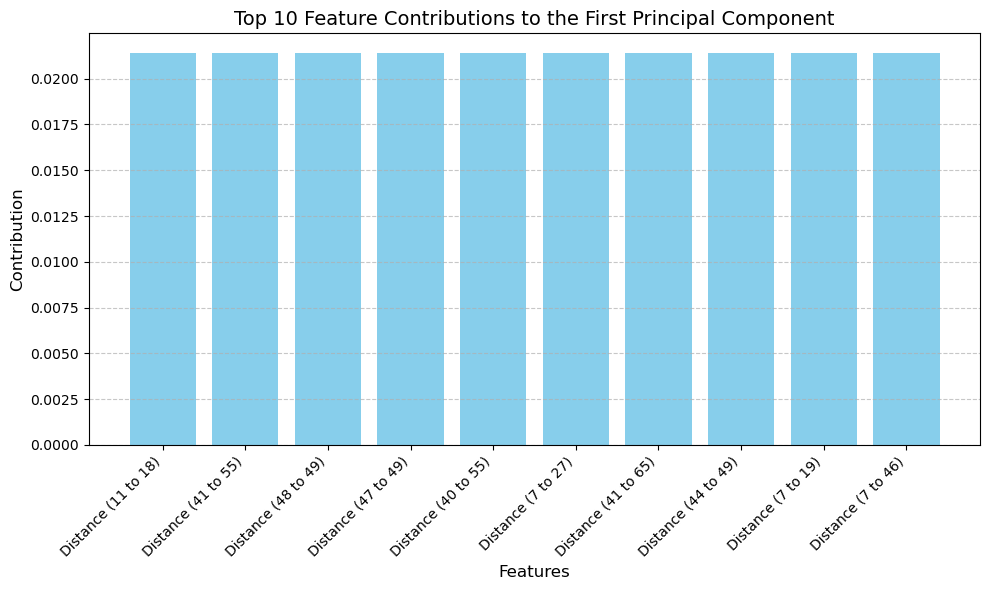

In [7]:
import matplotlib.pyplot as plt

# Plot feature contributions
plt.figure(figsize=(12, 6))
plt.bar(contributions_df['Feature'], contributions_df['Contribution'])
plt.title('Feature Contributions to the First Principal Component')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Select top contributing features
top_features = contributions_df.head(10)  # Show top 10 features

# Plot feature contributions
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Contribution'], color='skyblue')
plt.title('Top 10 Feature Contributions to the First Principal Component', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Contribution', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Tilt the x-axis labels slightly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

